**Veri Hazırlığı**

In [ ]:
!pip uninstall -y torch torchvision torchaudio

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 132.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms

normalize_transform = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

def enhance_image(img: Image.Image) -> Image.Image:
    img_cv = np.array(img)

    img_cv = cv2.GaussianBlur(img_cv, (3, 3), 0)

    img_yuv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

    return Image.fromarray(img_eq)

train_transforms = transforms.Compose([
    transforms.Lambda(enhance_image),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    normalize_transform
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize_transform
])

In [ ]:
zip_path = '/content/drive/MyDrive/yazlab2.3/dataset/train.zip'
!cp "$zip_path" /content/

import zipfile
import os

extract_path = '/content/drive/MyDrive/yazlab2.3/dataset/train'

with zipfile.ZipFile('/content/drive/MyDrive/yazlab2.3/dataset/train.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

cp: -r not specified; omitting directory '/content/drive/MyDrive/MultiZoo/train'


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/MultiZoo/train'

In [ ]:
!ls '/content/drive/MyDrive/yazlab2.3/dataset/train/train'

antelope     crab	goose	      leopard	 parrot		 sheep
badger	     crow	gorilla       lion	 pelecaniformes  snake
bat	     deer	grasshopper   lizard	 penguin	 sparrow
bear	     dog	hamster       lobster	 pig		 squid
bee	     dolphin	hare	      mosquito	 pigeon		 squirrel
beetle	     donkey	hedgehog      moth	 porcupine	 starfish
bison	     dragonfly	hippopotamus  mouse	 possum		 swan
boar	     duck	hornbill      octopus	 raccoon	 tiger
butterfly    eagle	horse	      okapi	 rat		 turkey
cat	     elephant	hummingbird   orangutan  reindeer	 turtle
caterpillar  flamingo	hyena	      otter	 rhinoceros	 whale
chimpanzee   fly	jellyfish     owl	 sandpiper	 wolf
cockroach    fox	kangaroo      ox	 seahorse	 wombat
cow	     goat	koala	      oyster	 seal		 woodpecker
coyote	     goldfish	ladybugs      panda	 shark		 zebra


**Dataset + Dataloader**

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

train_dataset_full = ImageFolder(root='/content/drive/MyDrive/yazlab2.3/dataset/train/train', transform=train_transforms)

train_size = int(0.8 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


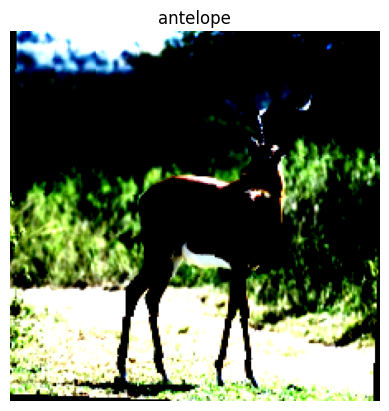

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(train_dataset_full.classes)

img, label = train_dataset_full[1]
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
plt.title(train_dataset_full.classes[label])
plt.axis('off')
plt.show()

**Model Hazırlıkları ve Model**

In [ ]:
!pip install timm --quiet

In [ ]:
!pip install timm --upgrade

In [ ]:
import timm
import torch.nn as nn
import torch
import torch.optim as optim

num_classes = len(train_dataset_full.dataset.classes if hasattr(train_dataset_full, 'dataset') else train_dataset_full.classes)

model = timm.create_model('deit_base_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

**Training**

In [ ]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

def train_model(model, train_loader, val_loader, epochs=10):
    best_acc = 0.0
    training_history = {
        "train_loss": [],
        "train_acc": [],
        "train_precision": [],
        "train_recall": [],
        "train_f1": [],
        "val_acc": [],
        "val_precision": [],
        "val_recall": [],
        "val_f1": []
    }

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        all_train_preds, all_train_labels = [], []

        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(labels.cpu().numpy())

        avg_train_loss = train_loss / total
        train_acc = correct / total
        train_precision = precision_score(all_train_labels, all_train_preds, average='weighted', zero_division=0)
        train_recall = recall_score(all_train_labels, all_train_preds, average='weighted', zero_division=0)
        train_f1 = f1_score(all_train_labels, all_train_preds, average='weighted', zero_division=0)

        print(f"Train Loss: {avg_train_loss:.4f} | Acc: {train_acc:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1: {train_f1:.4f}")

        training_history["train_loss"].append(avg_train_loss)
        training_history["train_acc"].append(train_acc)
        training_history["train_precision"].append(train_precision)
        training_history["train_recall"].append(train_recall)
        training_history["train_f1"].append(train_f1)

        # Validation
        model.eval()
        correct, total = 0, 0
        all_val_preds, all_val_labels = [], []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(labels.cpu().numpy())

        val_acc = correct / total
        val_precision = precision_score(all_val_labels, all_val_preds, average='weighted', zero_division=0)
        val_recall = recall_score(all_val_labels, all_val_preds, average='weighted', zero_division=0)
        val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted', zero_division=0)

        print(f"Val Acc: {val_acc:.4f} | Precision: {val_precision:.4f} | Recall: {val_recall:.4f} | F1: {val_f1:.4f}")

        training_history["val_acc"].append(val_acc)
        training_history["val_precision"].append(val_precision)
        training_history["val_recall"].append(val_recall)
        training_history["val_f1"].append(val_f1)

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), '/content/drive/MyDrive/yazlab2.3/trained_model/best_deit_model_V2.pth')
            print("✅ Model saved!")

    with open("/content/drive/MyDrive/yazlab2.3/trained_model/training_history.json", "w") as f:
        json.dump(training_history, f, indent=4)

In [ ]:
train_model(model, train_loader, val_loader, epochs=10)


Epoch 1/10


100%|██████████| 120/120 [52:16<00:00, 26.14s/it]


Train Loss: 2.0681 | Acc: 0.6095 | Precision: 0.6511 | Recall: 0.6095 | F1: 0.6165
Val Acc: 0.8595 | Precision: 0.8810 | Recall: 0.8595 | F1: 0.8530
✅ Model saved!

Epoch 2/10


100%|██████████| 120/120 [02:16<00:00,  1.14s/it]


Train Loss: 0.2629 | Acc: 0.9520 | Precision: 0.9527 | Recall: 0.9520 | F1: 0.9519
Val Acc: 0.8910 | Precision: 0.9110 | Recall: 0.8910 | F1: 0.8906
✅ Model saved!

Epoch 3/10


100%|██████████| 120/120 [02:23<00:00,  1.20s/it]


Train Loss: 0.0927 | Acc: 0.9864 | Precision: 0.9865 | Recall: 0.9864 | F1: 0.9863
Val Acc: 0.9130 | Precision: 0.9252 | Recall: 0.9130 | F1: 0.9138
✅ Model saved!

Epoch 4/10


100%|██████████| 120/120 [02:23<00:00,  1.20s/it]


Train Loss: 0.0469 | Acc: 0.9924 | Precision: 0.9925 | Recall: 0.9924 | F1: 0.9924
Val Acc: 0.9130 | Precision: 0.9290 | Recall: 0.9130 | F1: 0.9153

Epoch 5/10


100%|██████████| 120/120 [02:16<00:00,  1.14s/it]


Train Loss: 0.0215 | Acc: 0.9971 | Precision: 0.9972 | Recall: 0.9971 | F1: 0.9971
Val Acc: 0.9182 | Precision: 0.9308 | Recall: 0.9182 | F1: 0.9202
✅ Model saved!

Epoch 6/10


100%|██████████| 120/120 [02:24<00:00,  1.20s/it]


Train Loss: 0.0159 | Acc: 0.9990 | Precision: 0.9990 | Recall: 0.9990 | F1: 0.9989
Val Acc: 0.9151 | Precision: 0.9257 | Recall: 0.9151 | F1: 0.9159

Epoch 7/10


100%|██████████| 120/120 [02:16<00:00,  1.14s/it]


Train Loss: 0.0284 | Acc: 0.9955 | Precision: 0.9956 | Recall: 0.9955 | F1: 0.9955
Val Acc: 0.8910 | Precision: 0.9134 | Recall: 0.8910 | F1: 0.8939

Epoch 8/10


100%|██████████| 120/120 [02:16<00:00,  1.14s/it]


Train Loss: 0.0772 | Acc: 0.9814 | Precision: 0.9814 | Recall: 0.9814 | F1: 0.9813
Val Acc: 0.8784 | Precision: 0.9016 | Recall: 0.8784 | F1: 0.8815

Epoch 9/10


100%|██████████| 120/120 [02:16<00:00,  1.14s/it]


Train Loss: 0.0588 | Acc: 0.9872 | Precision: 0.9872 | Recall: 0.9872 | F1: 0.9871
Val Acc: 0.8847 | Precision: 0.9048 | Recall: 0.8847 | F1: 0.8870

Epoch 10/10


100%|██████████| 120/120 [02:15<00:00,  1.13s/it]


Train Loss: 0.0361 | Acc: 0.9919 | Precision: 0.9919 | Recall: 0.9919 | F1: 0.9919
Val Acc: 0.8994 | Precision: 0.9124 | Recall: 0.8994 | F1: 0.8999


NameError: name 'plot_learning_curve' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    fig, axs = plt.subplots(6, 1, figsize=(10, 30))
    plt.subplots_adjust(hspace=0.4)

    # 1. Train Loss
    axs[0].plot(epochs, history["train_loss"], marker='o', color='blue', label='Train Loss')
    axs[0].plot(epochs, history["val_loss"], marker='o', color='red', label='Val Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].grid(True)
    axs[0].legend()

    # 2. Accuracy
    axs[1].plot(epochs, history["train_acc"], marker='o', label='Train Acc')
    axs[1].plot(epochs, history["val_acc"], marker='o', label='Val Acc')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].grid(True)
    axs[1].legend()

    # 3. Precision
    axs[2].plot(epochs, history["train_precision"], marker='o', label='Train Precision')
    axs[2].plot(epochs, history["val_precision"], marker='o', label='Val Precision')
    axs[2].set_title('Precision')
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Precision')
    axs[2].grid(True)
    axs[2].legend()

    # 4. Recall
    axs[3].plot(epochs, history["train_recall"], marker='o', label='Train Recall')
    axs[3].plot(epochs, history["val_recall"], marker='o', label='Val Recall')
    axs[3].set_title('Recall')
    axs[3].set_xlabel('Epoch')
    axs[3].set_ylabel('Recall')
    axs[3].grid(True)
    axs[3].legend()

    # 5. F1-score
    axs[4].plot(epochs, history["train_f1"], marker='o', label='Train F1')
    axs[4].plot(epochs, history["val_f1"], marker='o', label='Val F1')
    axs[4].set_title('F1 Score')
    axs[4].set_xlabel('Epoch')
    axs[4].set_ylabel('F1 Score')
    axs[4].grid(True)
    axs[4].legend()

    axs[5].axis("off")

    plt.show()


In [ ]:
import json

history_path = "/content/drive/MyDrive/yazlab2.3/trained_model/training_history.json"

with open(history_path, "r") as f:
    training_history = json.load(f)

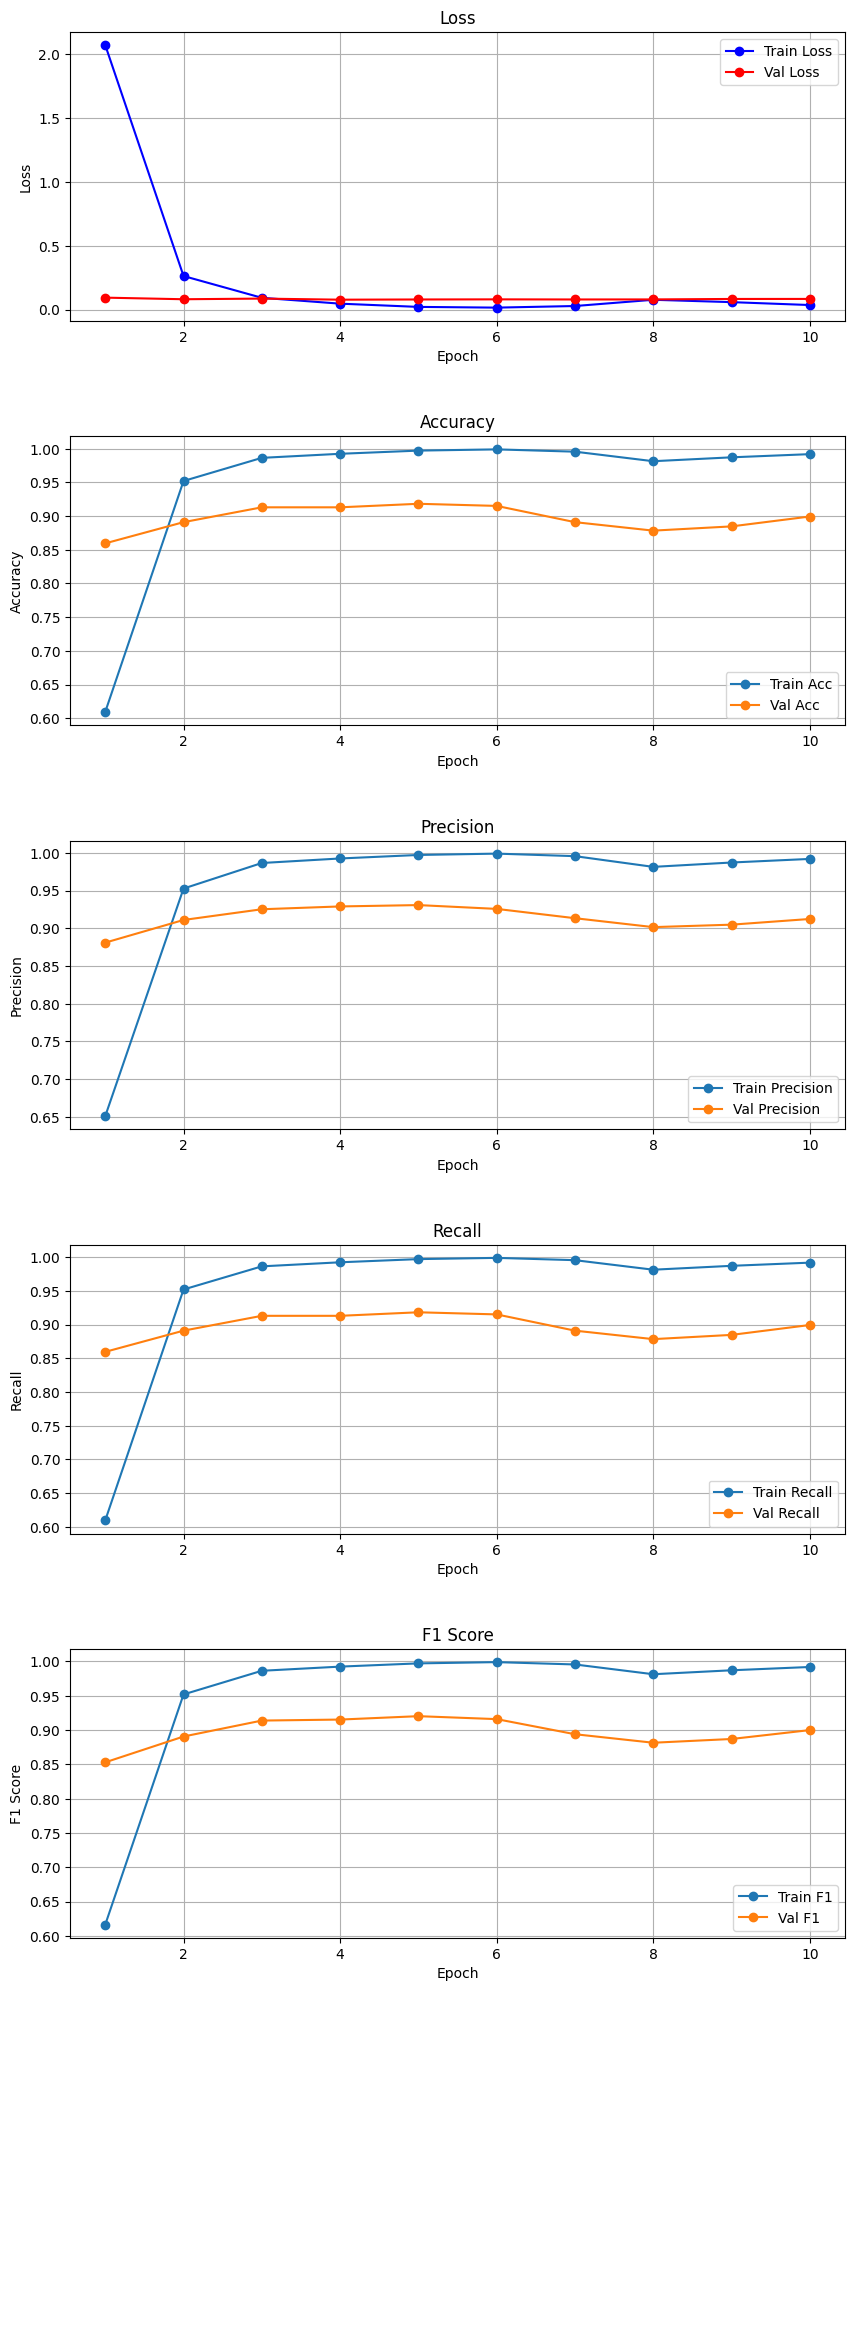

In [ ]:
plot_learning_curve(training_history)

In [ ]:
import torch
import json
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score

model.load_state_dict(torch.load('/content/drive/MyDrive/yazlab2.3/trained_model/best_deit_model_V2.pth'))
model.eval()

criterion = torch.nn.CrossEntropyLoss()

with open("/content/drive/MyDrive/yazlab2.3/trained_model/training_history.json", "r") as f:
    training_history = json.load(f)

val_losses = []

with torch.no_grad():
    for i in range(len(training_history["val_acc"])):
        val_loss = 0.0
        total = 0

        for inputs, labels in tqdm(val_loader, desc=f"Val Loss Hesaplanıyor (Epoch {i+1})"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            total += labels.size(0)

        avg_val_loss = val_loss / total
        val_losses.append(avg_val_loss)

training_history["val_loss"] = val_losses

Val Loss Hesaplanıyor (Epoch 10): 100%|██████████| 30/30 [00:23<00:00,  1.27it/s]


In [ ]:
with open("/content/drive/MyDrive/yazlab2.3/trained_model/training_history.json", "w") as f:
    json.dump(training_history, f, indent=4)

print("✅ val_loss başarıyla hesaplandı ve JSON dosyasına eklendi.")

✅ val_loss başarıyla hesaplandı ve JSON dosyasına eklendi.
